# Heart Rate Variability(HRV) processing pipeline in *Python*

# Step 1: Import the raw data

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
data = loadmat('F:/1_Emotion_Data/Physiology/Helpless/sub_001_helpless_1.mat')
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

# Step 2: ECG data extraction and cleaning

In [2]:
ecg = data['ecg_hl1']#Extract the ECG signal;
ecg = np.ndarray.flatten(ecg);#Flatten the 2-D array to 1-D
ecg_cleaned = nk.ecg_clean(ecg,sampling_rate=2000)

# Step 3: Obtain the peaks of the ECG signal

In [3]:
peaks,rpeaks = nk.ecg_peaks(ecg_cleaned,sampling_rate=2000,method="neurokit",correct_artifacts=True)

# Step 4: Time-doamin analysis

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,722.939189,24.105487,NaN,NaN,NaN,NaN,NaN,NaN,20.97492,21.046457,0.033344,0.029013,726.0,26.6868,0.036759,36.5,0.675676,33.783784,6.166667,93.75


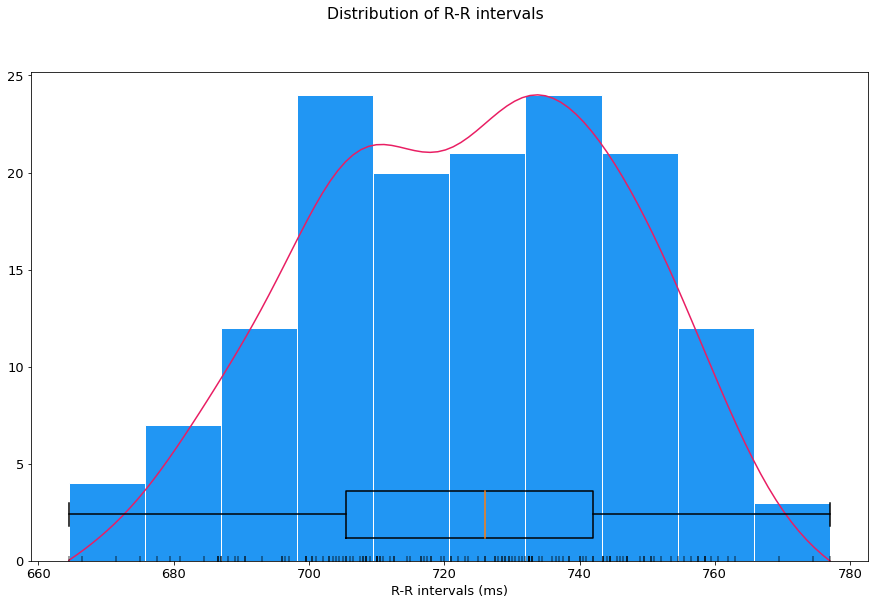

In [5]:
hrv_time = nk.hrv_time(peaks,sampling_rate=2000,show=True);hrv_time

# Step 5: Frequency-domain Analysis

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.046789,0.032597,0.00252,1.435378,0.571254,0.397982,-3.423534


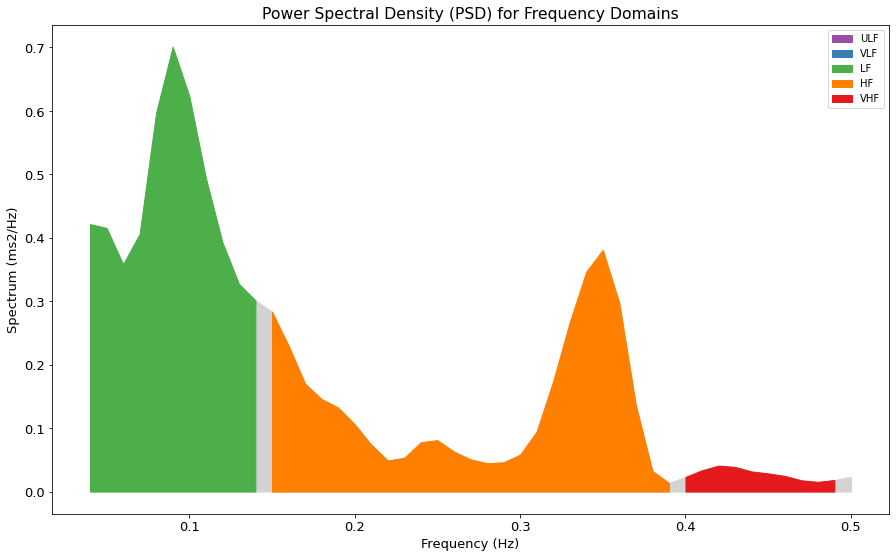

In [6]:
hrv_freq = nk.hrv_frequency(peaks,sampling_rate=2000,show=True);hrv_freq

# Step 6: Non-linear Domain Analysis

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:603: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax1[points], ax2[points], "ro", color="k", alpha=0.5, markersize=4)


,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,14.882092,30.760511,0.483805,1438.160689,2.066948,3.864778,254.321514,0.513514,0.513889,0.72973,...,1.909543,6.482772,1.347547,0.0,1.339362,1.816859,1.505713,1.670813,3.908362,0.876825


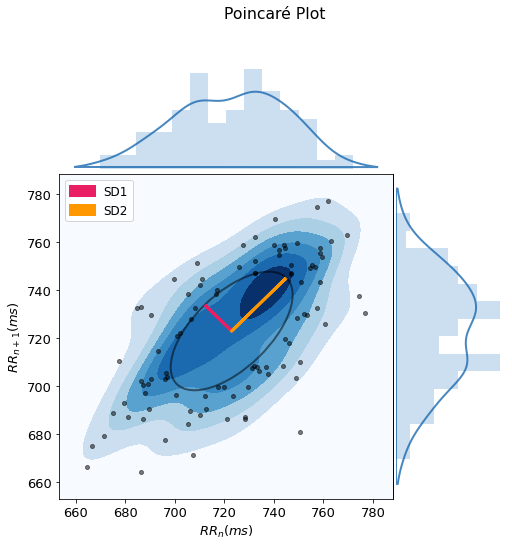

In [7]:
hrv_non = nk.hrv_nonlinear(peaks,sampling_rate=2000,show=True);hrv_non

# All domains

In [12]:
hrv_indices = nk.hrv(peaks, sampling_rate=2000, show=False)
print(hrv_indices)

   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  722.939189  24.105487         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN   20.97492  21.046457  ...    1.909543    6.482772   

   HRV_FuzzyEn  HRV_MSE  HRV_CMSE  HRV_RCMSE    HRV_CD   HRV_HFD   HRV_KFD  \
0     1.347547      0.0  1.339362   1.816859  1.505713  1.670813  3.908362   

    HRV_LZC  
0  0.876825  

[1 rows x 77 columns]
